In [1]:
import pandas as pd
import numpy as np

### We are going to work on binary classification problem, where we have some information about sample of people , and we need to predict whether we should give someone a loan or not depending on his information.

In [2]:
data_uri = "https://raw.githubusercontent.com/vasudevgupta31/acadamic_datasets/master/loan/loan_train.csv"

In [3]:
data = pd.read_csv(data_uri)

In [4]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,Male,No,0,Graduate,No,584900,0.0,15000000,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,458300,150800.0,12800000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,300000,0.0,6600000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,258300,235800.0,12000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,600000,0.0,14100000,360.0,1.0,Urban,Y


In [126]:
data.dtypes

Gender                 object
Married                object
Dependents             object
Education              object
Self_Employed          object
Applicant_Income        int64
Coapplicant_Income    float64
Loan_Amount             int64
Term                  float64
Credit_History        float64
Area                   object
Status                 object
dtype: object

In [133]:
(data.memory_usage(deep=True).sum() / 10**6)

0.284307

In [127]:
assign_dtypes = {'Gender': 'category',
                 'Married': 'category',
                 'Dependents': 'category',
                 'Education': 'category',
                 'Self_Employed': 'category',
                 'Area': 'category',
                 'Status': 'category'}

In [134]:
data = data.astype(assign_dtypes)

## EDA & EXPLORATION

#### GENDER -> CAN BE A BINARY VARIABLE -> FEMALE - 1 & MALE - 0

In [7]:
data['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [8]:
gender_table = (data
                 .groupby(['Gender', 'Status'])
                 .size()
                 .unstack(0)
                )

<AxesSubplot:xlabel='Status'>

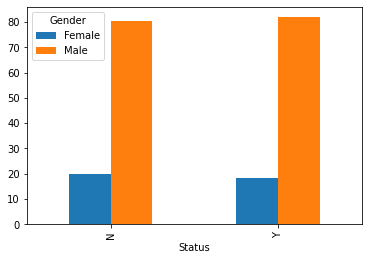

In [9]:
(gender_table.div(gender_table.sum(1), axis=0) * 100).plot.bar()

#### MARRIED - CAN BE A BINARY VARIABLE -> YES - 1 & NO - 0

In [10]:
data['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [11]:
married_table = (data
                 .groupby(['Married', 'Status'])
                 .size()
                 .unstack(0)
                )

<AxesSubplot:xlabel='Status'>

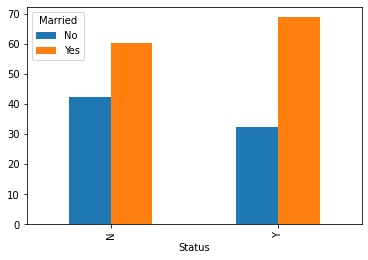

In [12]:
(married_table.div(gender_table.sum(1), axis=0) * 100).plot.bar()

#### DEPENDETS -> OHE (One hot Encoding)

In [13]:
data['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [14]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,Male,No,0,Graduate,No,584900,0.0,15000000,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,458300,150800.0,12800000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,300000,0.0,6600000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,258300,235800.0,12000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,600000,0.0,14100000,360.0,1.0,Urban,Y


### Education  -> BINARY FIELD 1- Graduate & 0 -Not Graduate

In [15]:
data['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [16]:
education_table = (data
                    .groupby(['Education', 'Status'])
                    .size()
                    .unstack(0))

In [17]:
(education_table.div(education_table.sum(1), axis=0) * 100)#.plot.bar()

Education,Graduate,Not Graduate
Status,,
N,72.916667,27.083333
Y,80.568720,19.431280


#### SELF EMPLOYED

In [18]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,Male,No,0,Graduate,No,584900,0.0,15000000,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,458300,150800.0,12800000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,300000,0.0,6600000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,258300,235800.0,12000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,600000,0.0,14100000,360.0,1.0,Urban,Y


In [19]:
data['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [20]:
self_employed_table = (data
                        .groupby(['Self_Employed', 'Status'])
                        .size()
                        .unstack(0))

In [21]:
(self_employed_table.div(self_employed_table.sum(1), axis=0) * 100)#.plot.bar()

Self_Employed,No,Yes
Status,,
N,85.792350,14.207650
Y,85.964912,14.035088


#### AREA -  OHE (One Hot Encoding)

In [22]:
data['Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Area, dtype: int64

In [23]:
area_table = (data
            .groupby(['Area', 'Status'])
            .size()
            .unstack(0))

<AxesSubplot:xlabel='Status'>

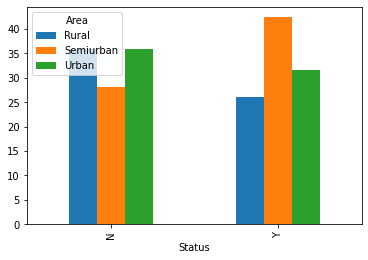

In [24]:
(area_table.div(area_table.sum(1), axis=0) * 100).plot.bar()

### TARGET - STATUS  -> BINARY VARIABLE (LABEL ENCODING)

<AxesSubplot:ylabel='Status'>

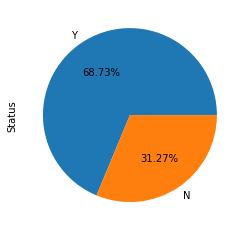

In [34]:
((data['Status'].value_counts() / data.shape[0])*100).plot.pie(autopct='%1.2f%%')

### OBJECT COLUMNS

In [138]:
data.select_dtypes(['category']).describe()

,Gender,Married,Dependents,Education,Self_Employed,Area,Status
count,601,611,599,614,582,614,614
unique,2,2,4,2,2,3,2
top,Male,Yes,0,Graduate,No,Semiurban,Y
freq,489,398,345,480,500,233,422


### NUMERIC COLUMNS

In [141]:
data.select_dtypes([int, float]).describe()

,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History
count,6.140000e+02,6.140000e+02,6.140000e+02,600.00000,564.000000
mean,5.403459e+05,1.621246e+05,1.414104e+07,342.00000,0.842199
std,6.109042e+05,2.926248e+05,8.815682e+06,65.12041,0.364878
min,1.500000e+04,0.000000e+00,0.000000e+00,12.00000,0.000000
25%,2.877500e+05,0.000000e+00,9.800000e+06,360.00000,1.000000
50%,3.812500e+05,1.188500e+05,1.250000e+07,360.00000,1.000000
75%,5.795000e+05,2.297250e+05,1.647500e+07,360.00000,1.000000
max,8.100000e+06,4.166700e+06,7.000000e+07,480.00000,1.000000


### HISTOGRAMS

In [39]:
import seaborn as sns

<AxesSubplot:xlabel='Term', ylabel='Count'>

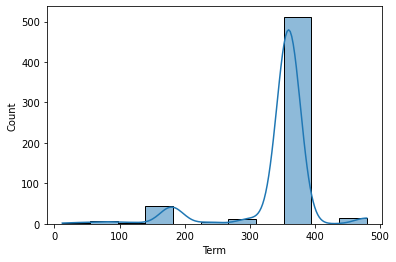

In [40]:
sns.histplot(data['Term'], kde=True)

<AxesSubplot:xlabel='Loan_Amount', ylabel='Count'>

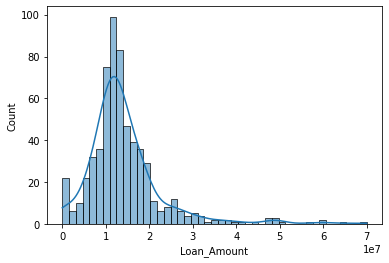

In [41]:
sns.histplot(data['Loan_Amount'], kde=True)

<AxesSubplot:xlabel='Coapplicant_Income', ylabel='Count'>

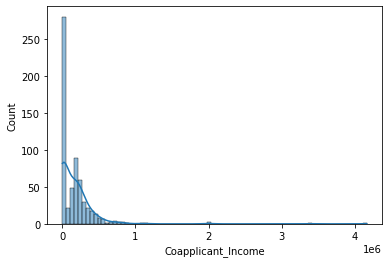

In [142]:
sns.histplot(data['Coapplicant_Income'], kde=True)    # FEATURE -> JOINT LOAN (Y/N ?)

In [43]:
### ADD FEATURE WITH APPLICANT INCOME + COAPPLICANT INCOME

In [44]:
### MISSING DATA

In [144]:
categorical_cols = data.select_dtypes('category').copy()    # IMPUTE WITH MODE
numerical_cols = data.select_dtypes([float, int]).copy()  # IMPUTE WITH MEDIAN

In [145]:
for col in categorical_cols:
    categorical_cols[col].fillna(value=categorical_cols[col].mode().values[0], inplace=True)

In [146]:
for col in numerical_cols:
    numerical_cols[col].fillna(value=numerical_cols[col].median(), inplace=True)

In [147]:
revised_data = pd.concat([categorical_cols, numerical_cols], axis=1)

### DATA PREP

In [157]:
prep_data = revised_data.copy(deep=True)

In [158]:
binary_cols = ['Gender', 'Married', 'Education', 'Self_Employed', 'Status']
ohe_cols = ['Dependents', 'Area']

In [159]:
from sklearn.preprocessing import LabelEncoder

In [160]:
for col in binary_cols:
    prep_data[col] = LabelEncoder().fit_transform(prep_data[col])

In [161]:
# pd.concat([prep_data['Status'], revised_data['Status']], axis=1)

In [162]:
dependent_dummies = pd.get_dummies(prep_data['Dependents'], prefix='Dependents')
area_dummies = pd.get_dummies(prep_data['Area'], prefix='Area')

In [163]:
prep_data = prep_data.drop(ohe_cols, axis=1)

In [164]:
final_data = pd.concat([prep_data, dependent_dummies, area_dummies], axis=1)

In [165]:
final_data.head()

,Gender,Married,Education,Self_Employed,Status,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Area_Rural,Area_Semiurban,Area_Urban
0,1,0,0,0,1,584900,0.0,15000000,360.0,1.0,1,0,0,0,0,0,1
1,1,1,0,0,0,458300,150800.0,12800000,360.0,1.0,0,1,0,0,1,0,0
2,1,1,0,1,1,300000,0.0,6600000,360.0,1.0,1,0,0,0,0,0,1
3,1,1,1,0,1,258300,235800.0,12000000,360.0,1.0,1,0,0,0,0,0,1
4,1,0,0,0,1,600000,0.0,14100000,360.0,1.0,1,0,0,0,0,0,1


### SPLIT X & Y

In [166]:
X = final_data.drop('Status', axis=1)
y = final_data['Status']

### TRAIN TEST SPLIT

In [167]:
from sklearn.model_selection import train_test_split

In [168]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.1)

print(f"Train X shape: {train_x.shape}")
print(f"Test X shape: {test_x.shape}")
print(f"Train Y shape: {train_y.shape}")
print(f"Test Y shape: {test_y.shape}")

In [169]:
print(f"Train X shape: {train_x.shape}")
print(f"Test X shape: {test_x.shape}")
print(f"Train Y shape: {train_y.shape}")
print(f"Test Y shape: {test_y.shape}")

Train X shape: (552, 16)
Test X shape: (62, 16)
Train Y shape: (552,)
Test Y shape: (62,)


### MODELS  -> CLASSIFICATION

In [170]:
from sklearn.metrics import classification_report

In [171]:
### 1 Logistic Regression

In [172]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures

In [173]:
# poly_fit = PolynomialFeatures(degree=2).fit(train_x)
# poly_trainx = poly_fit.transform(train_x)
# poly_testx = poly_fit.transform(test_x)

In [174]:
lgr = LogisticRegression()
lgr.fit(train_x, train_y)

LogisticRegression()

In [175]:
lgr_predictions_test = lgr.predict(test_x)
lgr_predictions_train = lgr.predict(train_x)

In [176]:
print("-------------- TRAIN SET -------------- ")
print(classification_report(y_true=train_y, y_pred=lgr_predictions_train))

print("-------------- TEST SET -------------- ")
print(classification_report(y_true=test_y, y_pred=lgr_predictions_test))

-------------- TRAIN SET -------------- 
              precision    recall  f1-score   support

           0       0.60      0.07      0.12       177
           1       0.69      0.98      0.81       375

    accuracy                           0.69       552
   macro avg       0.64      0.52      0.47       552
weighted avg       0.66      0.69      0.59       552

-------------- TEST SET -------------- 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        15
           1       0.75      0.94      0.83        47

    accuracy                           0.71        62
   macro avg       0.37      0.47      0.42        62
weighted avg       0.57      0.71      0.63        62



In [177]:
from sklearn.tree import DecisionTreeClassifier

In [178]:
dtr = DecisionTreeClassifier().fit(train_x, train_y)

In [179]:
dtr_predictions_test = dtr.predict(test_x)
dtr_predictions_train = dtr.predict(train_x)

In [180]:
print("-------------- TRAIN SET -------------- ")
print(classification_report(y_true=train_y, y_pred=dtr_predictions_train))

print("-------------- TEST SET -------------- ")
print(classification_report(y_true=test_y, y_pred=dtr_predictions_test))

-------------- TRAIN SET -------------- 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       177
           1       1.00      1.00      1.00       375

    accuracy                           1.00       552
   macro avg       1.00      1.00      1.00       552
weighted avg       1.00      1.00      1.00       552

-------------- TEST SET -------------- 
              precision    recall  f1-score   support

           0       0.42      0.53      0.47        15
           1       0.84      0.77      0.80        47

    accuracy                           0.71        62
   macro avg       0.63      0.65      0.64        62
weighted avg       0.74      0.71      0.72        62



In [181]:
## CORRELATION ANALYSIS
## FEATURE TRANSFORMATIONS
## FEATURE ENGINEERING ( TOTAL INCOME = SUM (INCOME COLS) , JOINT LOAN )
## PCA -> LOGISTIC REGRESSION
## NAIVE BAYES
## HYPER PARAMETER TUNING DECISION TREES   ( GRID SEARCH )
## RANDOM FOREST
## HYPER PARAMETER TUNING RANDOM FOREST    ( GRID SEARCH )
## PCA -> RF

In [120]:
# from imblearn.over_sampling import SMOTE
# sm = SMOTE(random_state = 2)
# X_train_res, y_train_res = sm.fit_resample(train_x, train_y.ravel())

In [185]:
# final_data.corr()

In [192]:
final_data['Total Income'] = final_data['Applicant_Income'] + final_data['Coapplicant_Income']
final_data['Joint Loan'] = (final_data['Coapplicant_Income'] > 0).astype(int)

### TRAIN TEST SPLIT

In [196]:
X = final_data.drop('Status', axis=1)
y = final_data['Status']

In [231]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.1)

print(f"Train X shape: {train_x.shape}")
print(f"Test X shape: {test_x.shape}")
print(f"Train Y shape: {train_y.shape}")
print(f"Test Y shape: {test_y.shape}")

Train X shape: (552, 18)
Test X shape: (62, 18)
Train Y shape: (552,)
Test Y shape: (62,)


### PCA

In [232]:
from sklearn.decomposition import PCA

In [233]:
pca_init = PCA(n_components=2)
pca_init.fit(train_x)

PCA(n_components=2)

In [234]:
pca_array_train = pca_init.transform(train_x)
pca_array_test = pca_init.transform(test_x)

In [235]:
pca_train = pd.DataFrame(pca_array_train, columns=['PCA1', 'PCA2'])
pca_test = pd.DataFrame(pca_array_test, columns=['PCA1', 'PCA2'])

In [236]:
loadings_df = pd.DataFrame(pca_init.components_, columns=train_x.columns)
loadings_df.index = ['PCA1', 'PCA2']

In [247]:
### MAKE A SCATTER PLOT (2D) AND COLOR BY TARGET VARIABLE!

scatter_plot_data = pd.concat([pca_train.reset_index(drop=True),
                               train_y.reset_index(drop=True)], axis=1)

<AxesSubplot:xlabel='PCA1', ylabel='PCA2'>

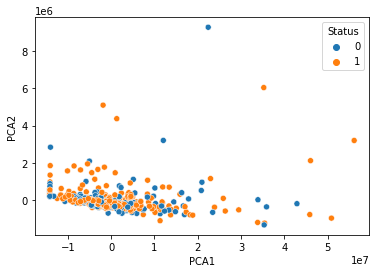

In [254]:
sns.scatterplot(data=scatter_plot_data, x='PCA1', y='PCA2', hue='Status')

In [255]:
lr_fit_pca = LogisticRegression()
lr_fit_pca.fit(pca_train, train_y)

LogisticRegression()

In [256]:
pca_lr_train_preds = lr_fit_pca.predict(pca_train)
pca_lr_test_preds = lr_fit_pca.predict(pca_test)

In [257]:
print("-------------- TRAIN SET -------------- ")
print(classification_report(y_true=train_y, y_pred=pca_lr_train_preds))

print("-------------- TEST SET -------------- ")
print(classification_report(y_true=test_y, y_pred=pca_lr_test_preds))

-------------- TRAIN SET -------------- 
              precision    recall  f1-score   support

           0       0.34      0.27      0.30       172
           1       0.70      0.76      0.72       380

    accuracy                           0.61       552
   macro avg       0.52      0.51      0.51       552
weighted avg       0.58      0.61      0.59       552

-------------- TEST SET -------------- 
              precision    recall  f1-score   support

           0       0.36      0.25      0.29        20
           1       0.69      0.79      0.73        42

    accuracy                           0.61        62
   macro avg       0.52      0.52      0.51        62
weighted avg       0.58      0.61      0.59        62



### GRID SEARCH FOR DECISION TREES

In [259]:
from sklearn.model_selection import GridSearchCV

In [262]:
dt_init = DecisionTreeClassifier(random_state=32)

In [263]:
param_grid = {'max_depth': range(2, 20), 
              'criterion': ["gini", "entropy"]}

In [264]:
grid_model = GridSearchCV(estimator=dt_init, param_grid=param_grid).fit(train_x, train_y)

In [269]:
grid_model.best_params_

{'criterion': 'gini', 'max_depth': 3}

In [267]:
dt_train_preds_grid = grid_model.predict(train_x)
dt_test_preds_grid = grid_model.predict(test_x)

In [270]:
train_x.shape

(552, 18)

In [268]:
print("-------------- TRAIN SET -------------- ")
print(classification_report(y_true=train_y, y_pred=dt_train_preds_grid))

print("-------------- TEST SET -------------- ")
print(classification_report(y_true=test_y, y_pred=dt_test_preds_grid))

-------------- TRAIN SET -------------- 
              precision    recall  f1-score   support

           0       0.90      0.51      0.65       172
           1       0.81      0.97      0.89       380

    accuracy                           0.83       552
   macro avg       0.86      0.74      0.77       552
weighted avg       0.84      0.83      0.81       552

-------------- TEST SET -------------- 
              precision    recall  f1-score   support

           0       0.71      0.50      0.59        20
           1       0.79      0.90      0.84        42

    accuracy                           0.77        62
   macro avg       0.75      0.70      0.72        62
weighted avg       0.77      0.77      0.76        62



In [ ]:
### ONCE READY WITH MODEL HOW TO AUTOMATE IT ? (MLOps)
### WHAT AFTER THE NOTEBOOK ?

### RANDOM FOREST

In [297]:
from sklearn.ensemble import RandomForestClassifier

In [309]:
# from imblearn.over_sampling import SMOTE
# sm = SMOTE(random_state = 2)
# X_train_res, y_train_res = sm.fit_resample(train_x, train_y.ravel())

In [302]:
rf_init = RandomForestClassifier(random_state=32)

In [303]:
param_grid_rf = {#"max_features": ["sqrt", "log2", None],
                 "criterion": ["gini", "entropy"],
                 "n_estimators": range(50, 150, 20),
                 "max_depth": range(2, 10)}

In [310]:
grid_model_rf = GridSearchCV(rf_init, 
                             param_grid=param_grid_rf,
                             verbose=3,
                             n_jobs=-1,
                             cv=3).fit(train_x, train_y)

Fitting 3 folds for each of 80 candidates, totalling 240 fits


In [311]:
grid_model_rf.best_params_

{'criterion': 'entropy', 'max_depth': 6, 'n_estimators': 50}

In [312]:
rf_train_preds_grid = grid_model_rf.predict(train_x)
rf_test_preds_grid = grid_model_rf.predict(test_x)

In [313]:
print("-------------- TRAIN SET -------------- ")
print(classification_report(y_true=train_y, y_pred=rf_train_preds_grid))

print("-------------- TEST SET -------------- ")
print(classification_report(y_true=test_y, y_pred=rf_test_preds_grid))

-------------- TRAIN SET -------------- 
              precision    recall  f1-score   support

           0       0.97      0.49      0.65       172
           1       0.81      0.99      0.89       380

    accuracy                           0.84       552
   macro avg       0.89      0.74      0.77       552
weighted avg       0.86      0.84      0.82       552

-------------- TEST SET -------------- 
              precision    recall  f1-score   support

           0       0.77      0.50      0.61        20
           1       0.80      0.93      0.86        42

    accuracy                           0.79        62
   macro avg       0.78      0.71      0.73        62
weighted avg       0.79      0.79      0.78        62



### NAIVE BAYES

In [292]:
# from sklearn.naive_bayes import GaussianNB

In [293]:
# nb_init = GaussianNB()
# nb_init.fit(train_x, train_y)

In [294]:
# nb_train_preds_grid = nb_init.predict(train_x)
# nb_test_preds_grid = nb_init.predict(test_x)

In [295]:
# print("-------------- TRAIN SET -------------- ")
# print(classification_report(y_true=train_y, y_pred=nb_train_preds_grid))

# print("-------------- TEST SET -------------- ")
# print(classification_report(y_true=test_y, y_pred=nb_test_preds_grid))

In [ ]:
### DECIDED WITH A MODEL - > WHAT NEXT ?

#### COMPLETE PROCESS WOULD LIKE THIS :

In [316]:
auto_data = data.copy()

In [320]:
new_incoming_data = auto_data.tail(50)    # SHARED LATER

In [323]:
current_data = auto_data.iloc[:-50].copy()   # SHARE NOW

In [324]:
X_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
          'Applicant_Income', 'Coapplicant_Income', 'Loan_Amount', 'Term',
          'Credit_History', 'Area']
y_col = 'Status'

In [325]:
current_x_data = current_data[X_cols]

In [329]:
model = RandomForestClassifier().fit(current_x_data, current_y_data)

In [ ]:
predictions = model.predict(new_incoming_data)

In [ ]:
# predictions shared with client